In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [4]:
d0=pd.read_csv('mnist_train.csv')

In [5]:
print(d0.head(5))

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [9]:
print(d0.size)

32970000


In [10]:
print(d0.shape)

(42000, 785)


In [11]:
l=d0['label']

In [16]:
d=d0.drop('label',axis=1)

In [18]:
l.shape

(42000,)

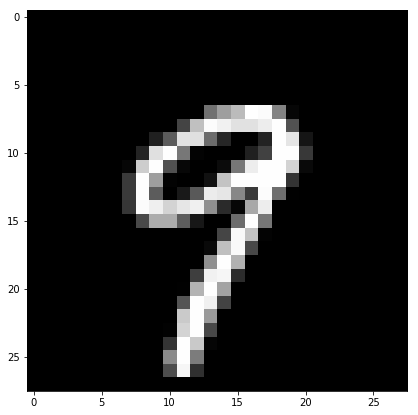

In [34]:
plt.figure(figsize=(7,7))
idx=4823
grid_data=d.iloc[idx].values.reshape(28,28)
plt.imshow(grid_data,interpolation='none',cmap='gray')
plt.show()

In [35]:
l[4823]

9

# PCA VISUALIZATION ON 2D


In [36]:
labels=l.head(15000)
data=d.head(15000)


In [37]:
labels.shape

(15000,)

In [39]:
data.shape

(15000, 784)

In [41]:
#First step is standardization of data called as Data preprocessing
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

C:\Users\Mohan Bishnoi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


(15000, 784)


C:\Users\Mohan Bishnoi\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [44]:
#second step is covariance matrix
sample_data=standardized_data
covar_matrix=np.matmul(sample_data.T,sample_data)
print(covar_matrix.shape)

(784, 784)


In [46]:
from scipy.linalg import eigh
values,vectors=eigh(covar_matrix,eigvals=(782,783))
print(vectors.shape)
vectors=vectors.T
print(vectors.shape)

(784, 2)
(2, 784)


In [48]:
new_coordinates=np.matmul(vectors,sample_data.T)
new_coordinates.shape

(2, 15000)

In [49]:
import pandas as pd

# appending label to the 2d projected data
new_coordinates = np.vstack((new_coordinates, labels)).T

# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -5.558661      -5.043558    1.0
1       6.193635      19.305278    0.0
2      -1.909878      -7.678775    1.0
3       5.525748      -0.464845    4.0
4       6.366527      26.644289    0.0


C:\Users\Mohan Bishnoi\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


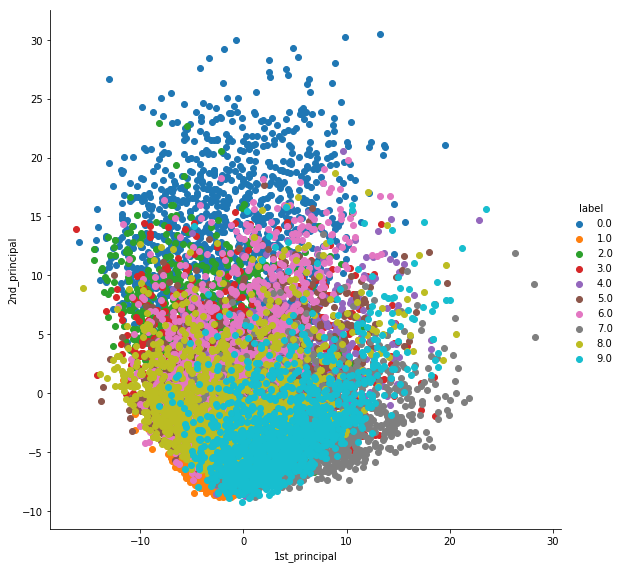

In [51]:
# ploting the 2d data points with seaborn
import seaborn as sn
sn.FacetGrid(dataframe, hue="label", size=8).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

In [68]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()

In [69]:
pca.n_components=2

In [70]:
# configuring the parameteres
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)


shape of pca_reduced.shape =  (15000, 2)


C:\Users\Mohan Bishnoi\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


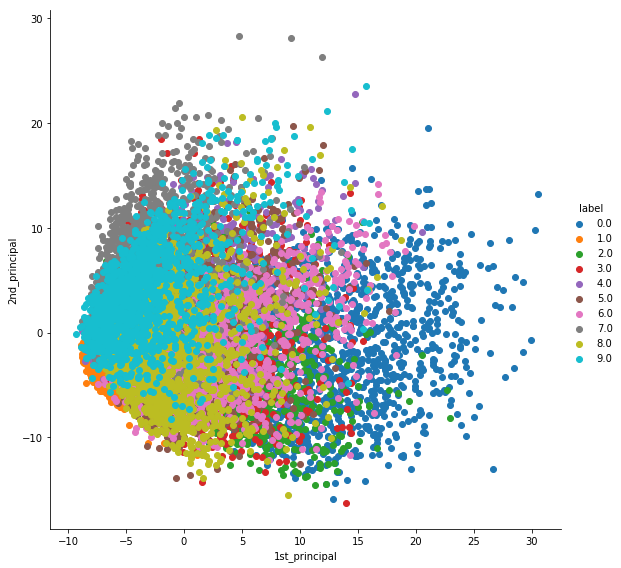

In [71]:
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, labels)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", size=8).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

In [ ]:
#NOW USING TSNE

C:\Users\Mohan Bishnoi\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


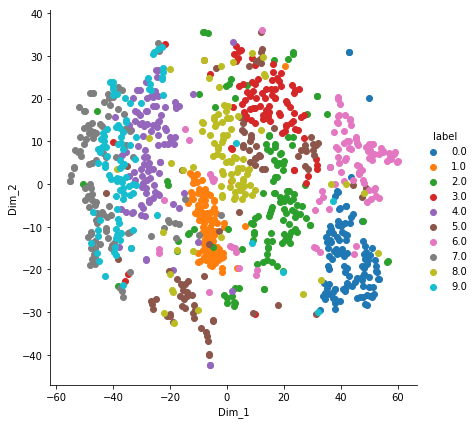

In [72]:

from sklearn.manifold import TSNE

# Picking the top 1000 points as TSNE takes a lot of time for 15K points
data_1000 = standardized_data[0:1000,:]
labels_1000 = labels[0:1000]

model = TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(data_1000)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()